In [102]:
import pandas as pd
import numpy as np

from scipy import signal

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
gw_df = pd.read_csv('../data/gw-raw-data/richers_1764.csv')

# y-axis processing
# distance = 3.086e22
# gw_df = gw_df / distance

In [95]:
parameters_df = pd.read_csv('../data/gw-raw-data/richers_1764_parameters.csv')

# limit to only 3 most important parameters
parameters_selected_df = parameters_df[['A(km)', 'omega_0(rad|s)', 'beta1_IC_b']]
parameters_selected_df.rename(columns={'omega_0(rad|s)': 'omega_0'}, inplace=True)
parameters_selected_df.rename(columns={'A(km)': 'A'}, inplace=True)

/var/folders/qy/p5knypnd54x1dfyxqbs0175r0000gn/T/ipykernel_55545/2366009249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_selected_df.rename(columns={'omega_0(rad|s)': 'omega_0'}, inplace=True)
/var/folders/qy/p5knypnd54x1dfyxqbs0175r0000gn/T/ipykernel_55545/2366009249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_selected_df.rename(columns={'A(km)': 'A'}, inplace=True)


### Parameter Analysis

#### A: differential rotation parameter in Equation 5 (km)

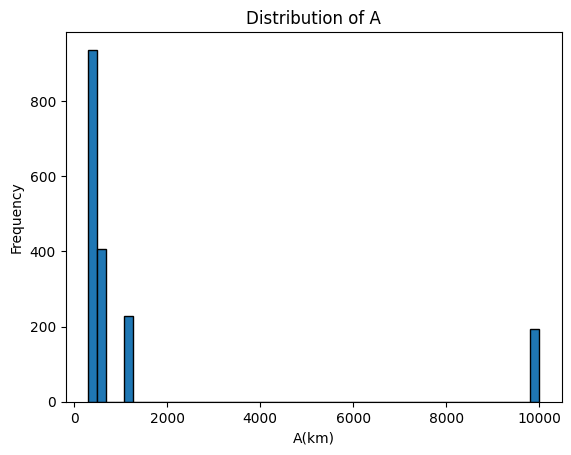

In [96]:
plt.hist(parameters_selected_df['A'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('A(km)')
plt.ylabel('Frequency')
plt.title('Distribution of A')
plt.show()

There is a noticeable number of supernovae with differential rotation parameter values around 10000 km, quite an outlier from the ones around 500 - 1500 km. Not sure why?

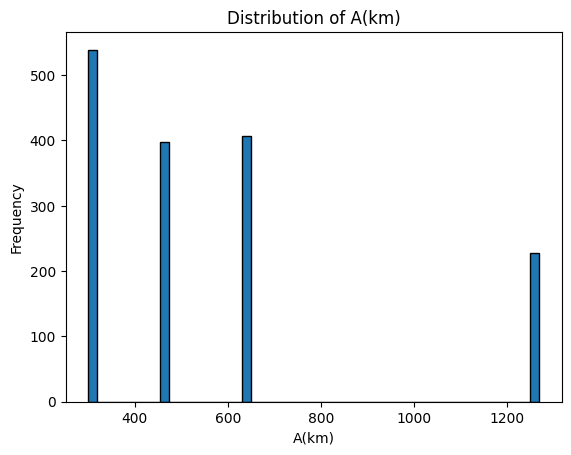

In [98]:
plt.hist(parameters_selected_df['A'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('A(km)')
plt.ylabel('Frequency')
plt.title('Distribution of A(km)')
plt.show()

#### omega_0: initial (pre-collapse) rotation rate used in Equation 5 (rad/s)

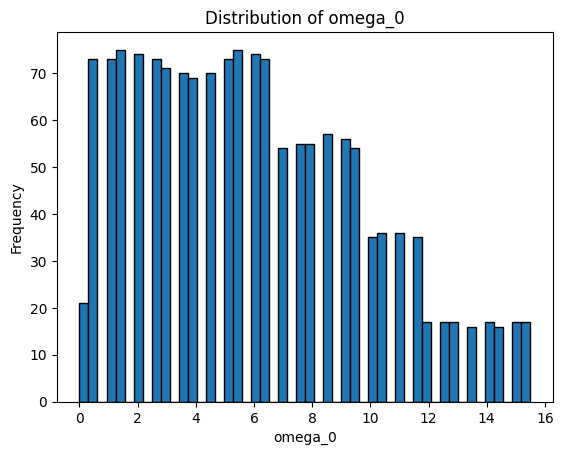

In [99]:
plt.hist(parameters_selected_df['omega_0'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('omega_0')
plt.ylabel('Frequency')
plt.title('Distribution of omega_0')
plt.show()

#### beta1_IC_b: ratio of rotational kinetic to gravitational potential energy of the inner core at bounce

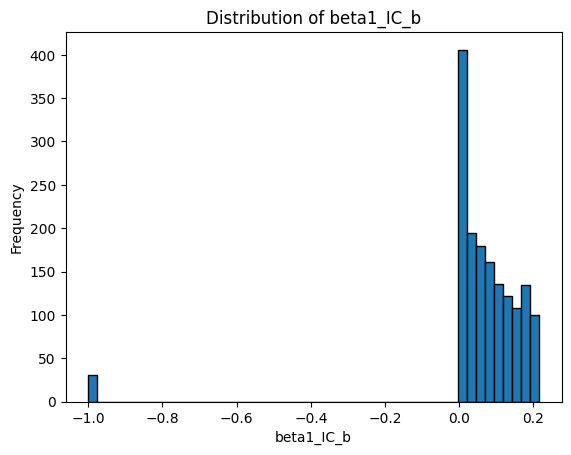

In [100]:
plt.hist(parameters_selected_df['beta1_IC_b'], bins=50, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('beta1_IC_b')
plt.ylabel('Frequency')
plt.title('Distribution of beta1_IC_b')
plt.show()

Where does the source of -1.0 come from?

/Users/tarineccleston/Documents/software-ds/gravitational-waves/gw-env/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


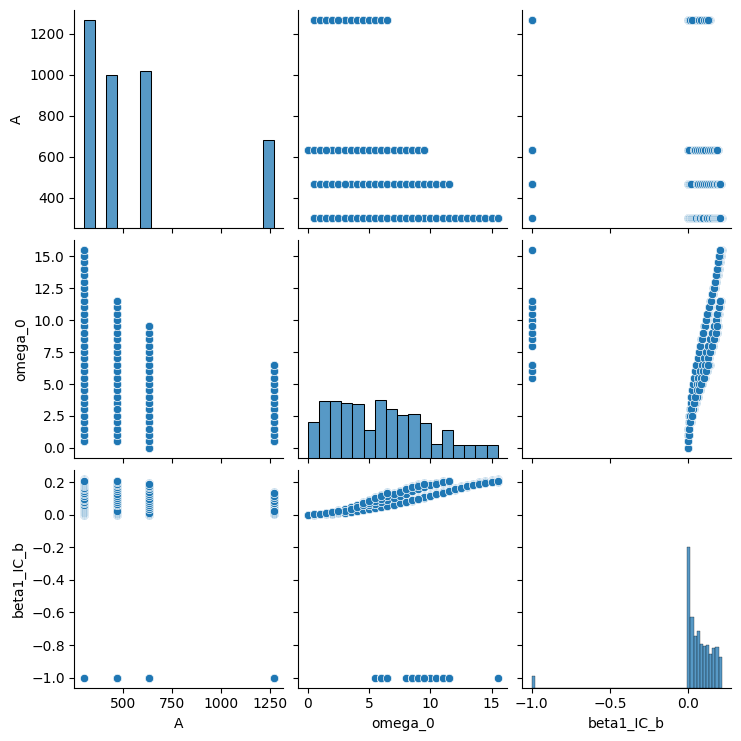

In [103]:
sns.pairplot(parameters_selected_df)